# Using reduced GALAH spectra and tables

## Opening a table

In [14]:
# Load galah_tools
!git clone https://github.com/sheliak/galah_tools.git
import sys
sys.path.append('galah_tools')

# Load data
!git clone https://github.com/sheliak/galah_workshop.git
!cp -r galah_workshop/sample_data .
!rm -r galah_workshop

# Import necessary modules
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (25, 10)
from astropy.io import fits
from astropy.table import Table

fatal: destination path 'galah_tools' already exists and is not an empty directory.
Cloning into 'galah_workshop'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 67 (delta 12), reused 51 (delta 5), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [2]:
# Open table
table_filename = 'sample_data/dr6.0.fits'

hdul = fits.open(table_filename)
table = Table(hdul[1].data)

table.pprint_all()


   sobject_id      ra       dec     ra_icrs   dec_icrs        mjd                 utdate               epoch            mjd_s               utdate_s             epoch_s            mjd_e               utdate_e             epoch_e      aperture pivot fibre fibre_x  fibre_y  fibre_theta plate aperture_position [4]  mean_ra   mean_dec  mean_zd  mean_airmass  mean_ha                       cfg_file                                          cfg_field_name                                          obj_name                         galah_id          2mass             gaia_id               snr [4]                snr_AA [4]         fibre_throughput [4]      telluric_h2o [4]     telluric_o2 [4]          res [4]            b_par [4]    v_bary_eff exposed  mag  e_b-v     wav_rms [4]            wav_n_lines          n_combined          rv [4]                  e_rv [4]           rv_com    e_rv_com    teff_r    logg_r     fe_h_r      alpha_fe_r    vmic_r   vbroad_r                       obs_comment        

Text(0.5, 0, '(individual $v_r$ - combined $v_r$) / $\\mathrm{km\\,s^{-1}}$')

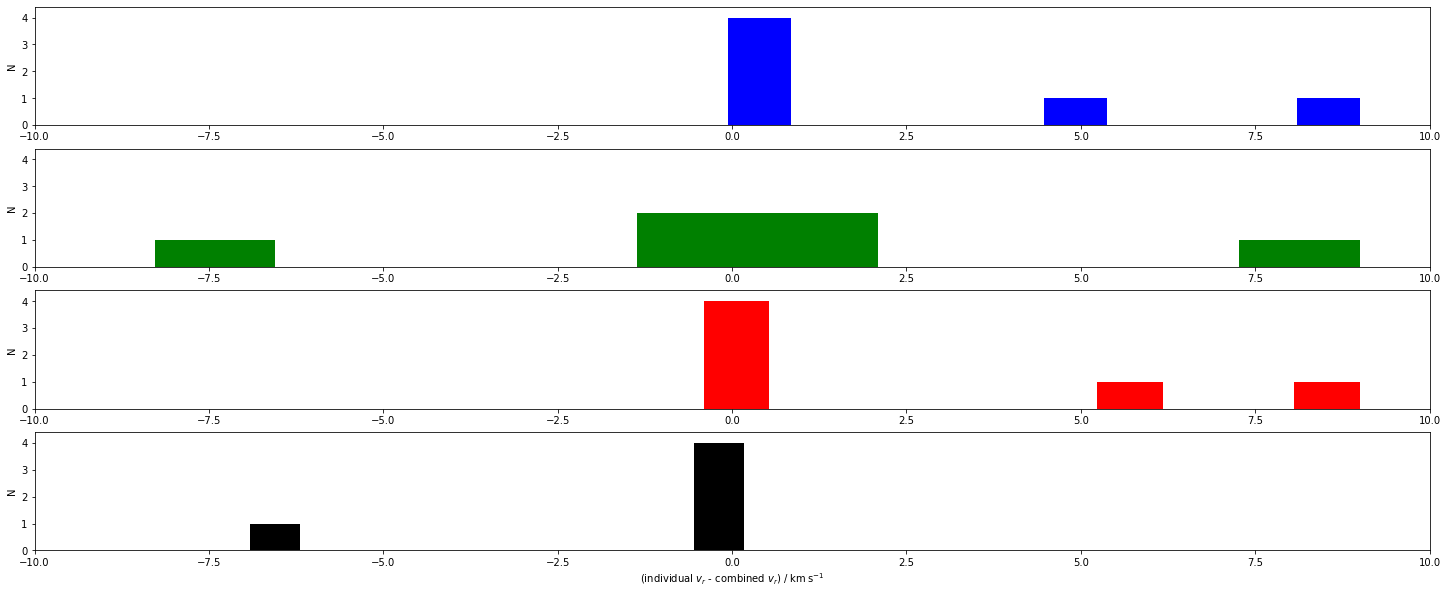

In [35]:
# Working with astropy tables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)

for ccd, color, ax in [[1, 'b', ax1], [2, 'g', ax2], [3, 'r', ax3], [4, 'k', ax4]]:
    ax.hist(table['rv'][:,ccd-1]-table['rv_com'], fc=color)
    ax.set_xlim(-10,10)
    ax.set_ylim(0,4.4)
    ax.set_ylabel(r'N')
ax.set_xlabel(r'(individual $v_r$ - combined $v_r$) / $\mathrm{km\,s^{-1}}$')

Text(0.5, 1.0, 'Kiel diagram')

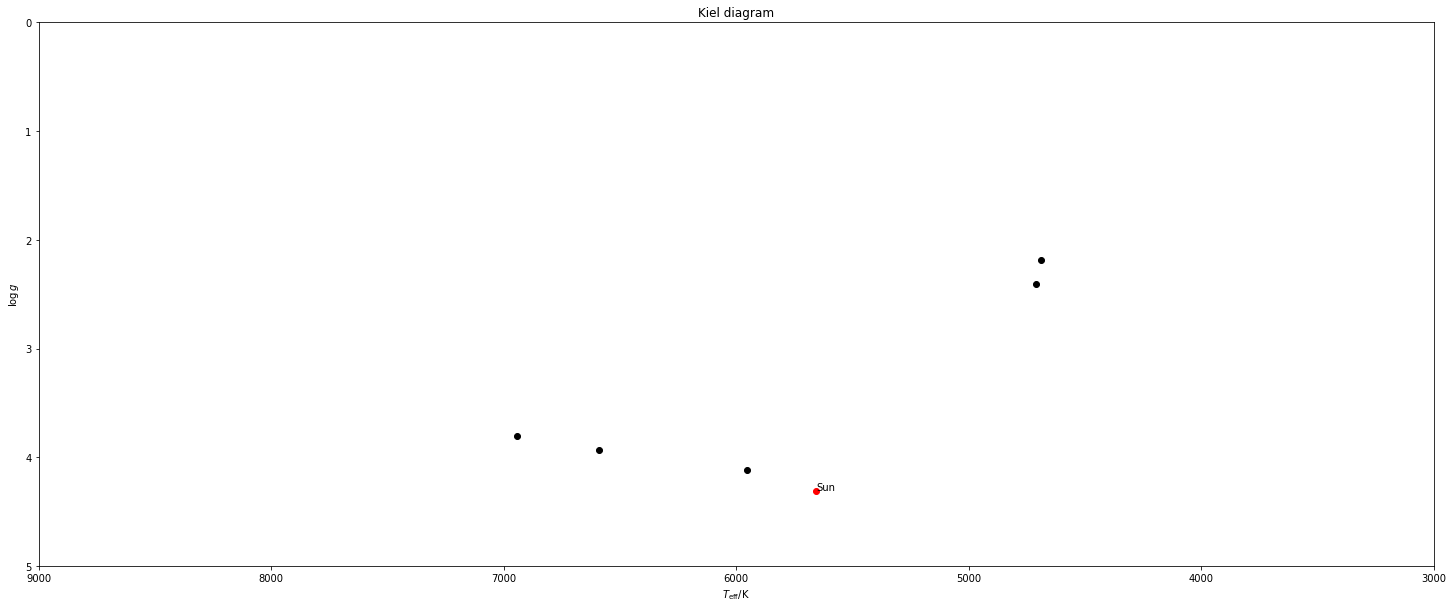

In [37]:
plt.plot(table['teff_r'][:-1], table['logg_r'][:-1], 'ko')
plt.plot(table['teff_r'][-1], table['logg_r'][-1], 'ro')
plt.text(table['teff_r'][-1], table['logg_r'][-1], 'Sun')
plt.xlim(9000,3000)
plt.ylim(5,0)
plt.xlabel(r'$T_\mathrm{eff} / \mathrm{K}$')
plt.ylabel(r'$\log\, g$')
plt.title('Kiel diagram')

## Opening a spectrum

In [ ]:
# Examining the extensions
hdul = fits.open('sample_data/210115/spectra/com/2101150001010053.fits')
hdul.info()

Filename: sample_data/210115/spectra/com/2101150001010053.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   (4096,)   float64   
  1  normalized    1 ImageHDU       251   (4096,)   float64   
  2  relative_error    1 ImageHDU       251   (4096,)   float64   
  3  sky           1 ImageHDU       251   (4096,)   float64   
  4  teluric       1 ImageHDU       251   (4096,)   float64   
  5  scattered     1 ImageHDU       251   (4096,)   float32   
  6  cross_talk    1 ImageHDU       251   (4096,)   float64   
  7  resolution_profile    1 ImageHDU       251   (4096,)   float32   


Text(0.5, 1.0, 'Spectrum in extension 0')

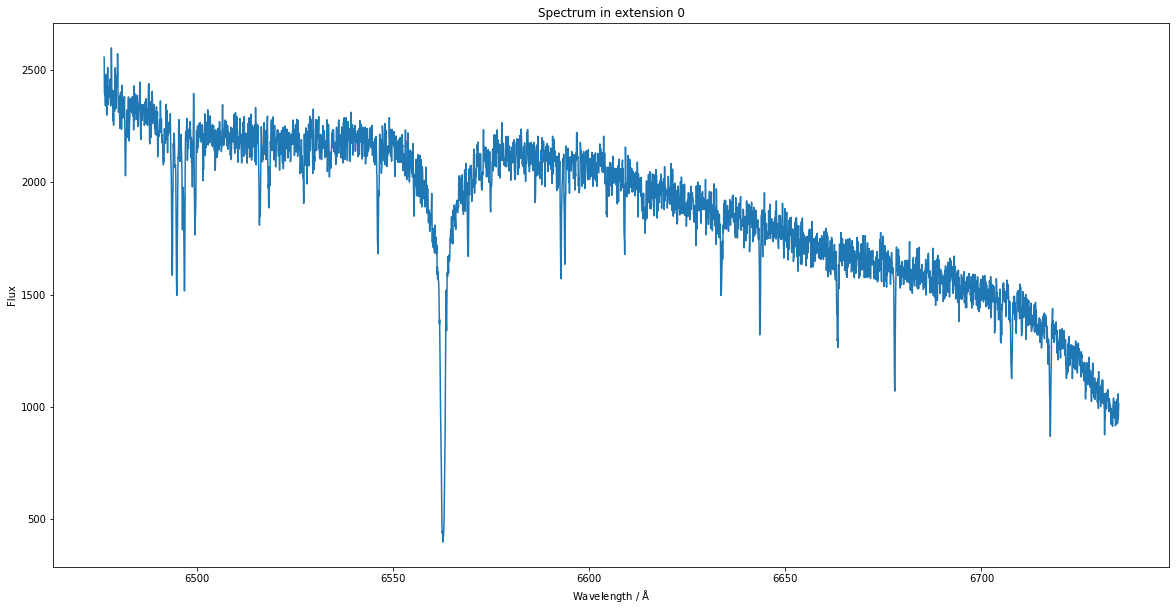

In [ ]:
# Constructing a wavelength array
ext = hdul[0]
wav = np.arange(start = ext.header['CRVAL1'], stop = ext.header['CRVAL1']+ext.header['CDELT1']*ext.header['NAXIS1'], step = ext.header['CDELT1'])
flux = ext.data

plt.plot(wav,flux,'-')
plt.xlabel(r'Wavelength / $\mathrm{\AA}$')
plt.ylabel(r'Flux')
plt.title(r'Spectrum in extension 0')

Text(0.5, 1.0, 'Spectrum in extension 1')

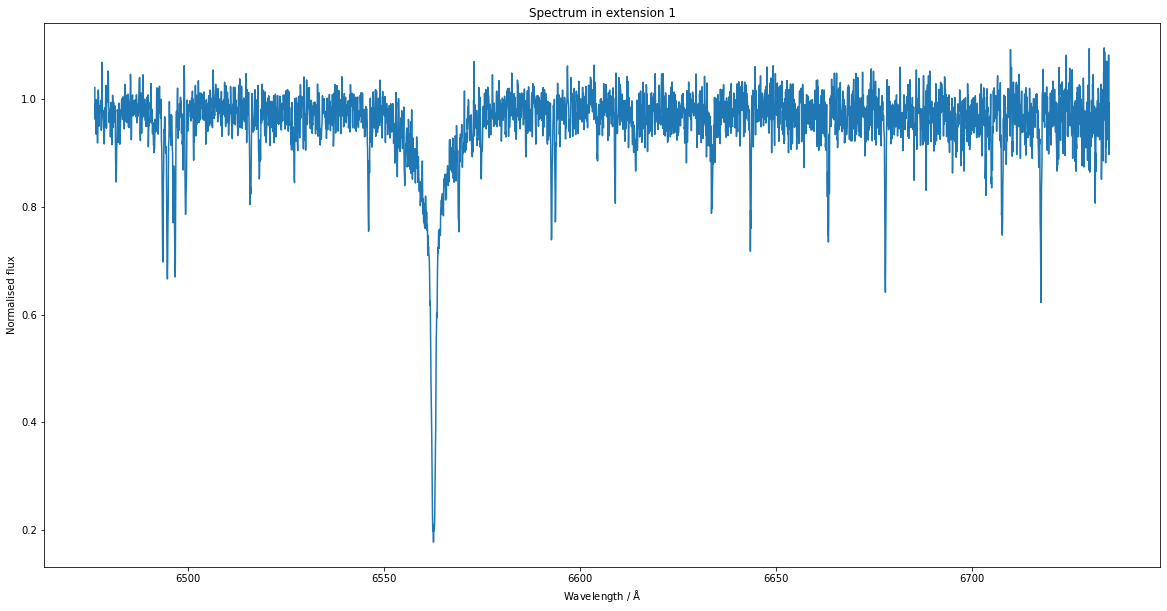

In [ ]:
# Other extensions
ext = hdul[1]
wav = np.arange(start = ext.header['CRVAL1'], stop = ext.header['CRVAL1']+ext.header['CDELT1']*ext.header['NAXIS1'], step = ext.header['CDELT1'])
flux = ext.data

plt.plot(wav,flux,'-')
plt.xlabel(r'Wavelength / $\mathrm{\AA}$')
plt.ylabel(r'Normalised flux')
plt.title(r'Spectrum in extension 1')

## Using galah_tools to open spectra and manipulate them

In [ ]:
# Setting up
import galah_tools as gt
gt.setup(root_folder='sample_data')

Radial velocity is 31.9151 km/s


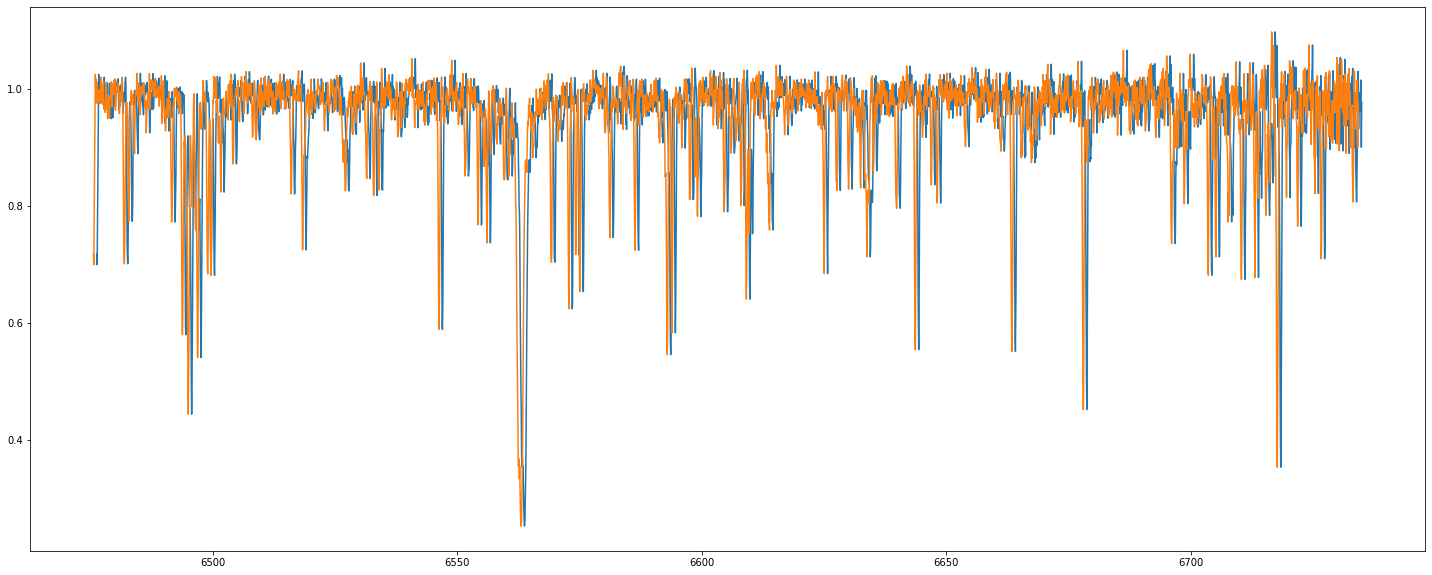

In [ ]:
# Opening the spectrum
s1=gt.read('2101150001010023')

plt.plot(s1.l,s1.f,'-')

s2=gt.read('2101150001010023', wavelength='object')

print('Radial velocity is %.4f km/s' % s2.rv)

plt.plot(s2.l,s2.f,'-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


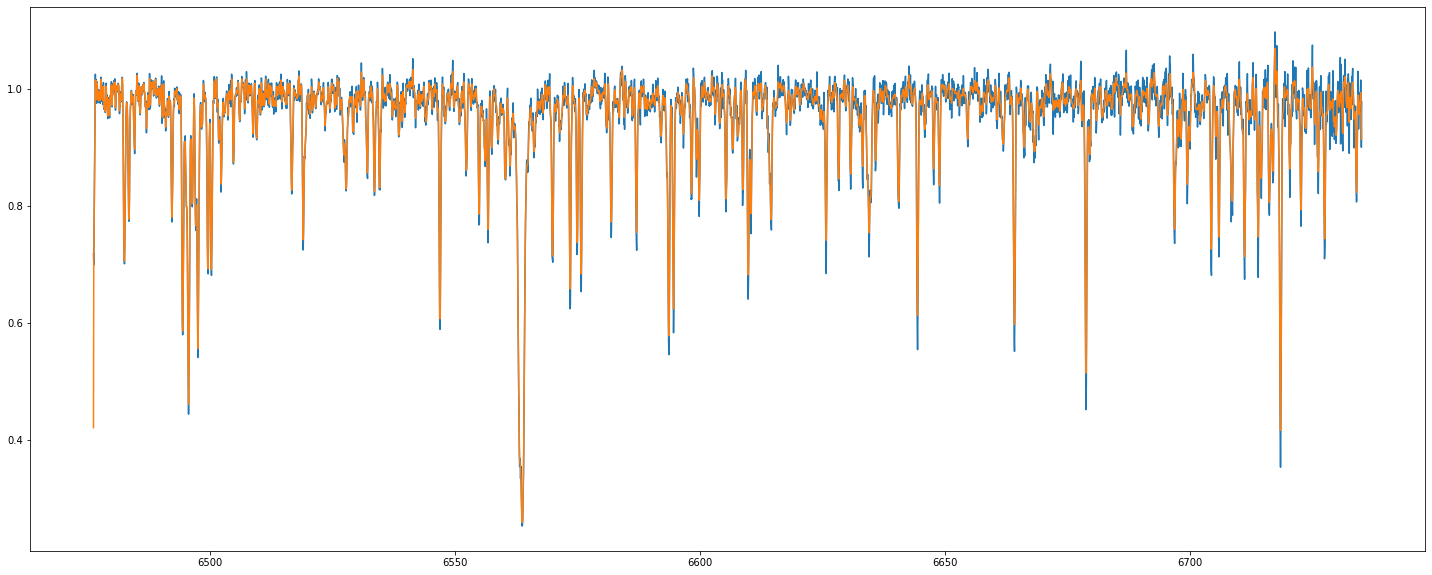

In [ ]:
# Using the resolution profile
plt.plot(s1.l,s1.f,'-')

s1.equalize_resolution()

plt.plot(s1.l,s1.f,'-')

Text(0.5, 1.0, 'Resolution profile')

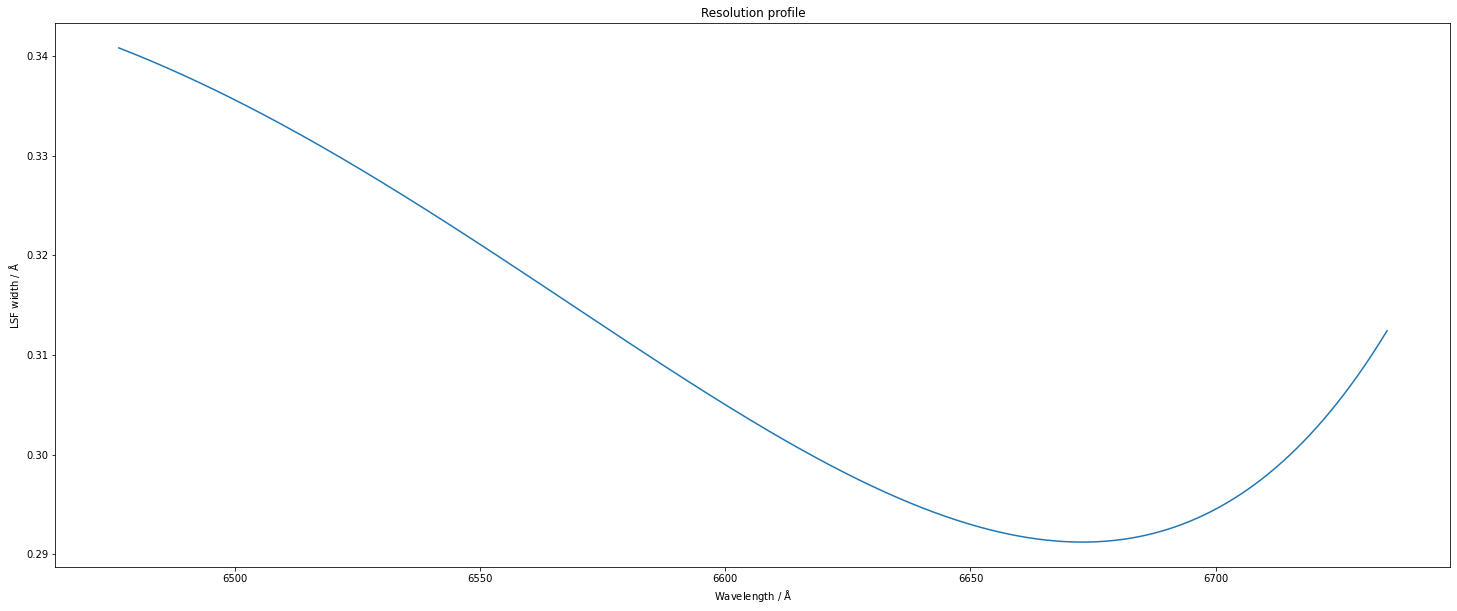

In [ ]:
plt.plot(s1.l,s1.res_map,'-')
plt.xlabel(r'Wavelength / $\mathrm{\AA}$')
plt.ylabel(r'LSF width / $\mathrm{\AA}$')
plt.title(r'Resolution profile')